**Problem Statement** : Whether the client will default or not on the home loan taken<br>
**Target Variable** : TARGET (CATEGORICAL)

**It is a supervised ML classification problem**

In [1]:
import pandas as pd
import numpy as np
import warnings as wn

In [2]:
wn.filterwarnings('ignore')

In [3]:
hcd=pd.read_csv("E:\\OneDrive\\DS\\Documents\\Internship\\G-Square\\Home Credit Default\\application_train.csv",encoding="latin")

In [4]:
#hcd #307511 rows & 122 columns

In [5]:
Delete_List=['TARGET','SK_ID_CURR','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','DAYS_LAST_PHONE_CHANGE',
'FLAG_DOCUMENT_2',
'FLAG_DOCUMENT_3',
'FLAG_DOCUMENT_4',
'FLAG_DOCUMENT_5',
'FLAG_DOCUMENT_6',
'FLAG_DOCUMENT_7',
'FLAG_DOCUMENT_8',
'FLAG_DOCUMENT_9',
'FLAG_DOCUMENT_10',
'FLAG_DOCUMENT_11',
'FLAG_DOCUMENT_12',
'FLAG_DOCUMENT_13',
'FLAG_DOCUMENT_14',
'FLAG_DOCUMENT_15',
'FLAG_DOCUMENT_16',
'FLAG_DOCUMENT_17',
'FLAG_DOCUMENT_18',
'FLAG_DOCUMENT_19',
'FLAG_DOCUMENT_20',
'FLAG_DOCUMENT_21','AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'APARTMENTS_AVG',
'BASEMENTAREA_AVG',
'YEARS_BEGINEXPLUATATION_AVG',
'YEARS_BUILD_AVG',
'COMMONAREA_AVG',
'ELEVATORS_AVG',
'ENTRANCES_AVG',
'FLOORSMAX_AVG',
'FLOORSMIN_AVG',
'LANDAREA_AVG',
'LIVINGAPARTMENTS_AVG',
'LIVINGAREA_AVG',
'NONLIVINGAPARTMENTS_AVG',
'NONLIVINGAREA_AVG',
'APARTMENTS_MODE',
'BASEMENTAREA_MODE',
'YEARS_BEGINEXPLUATATION_MODE',
'YEARS_BUILD_MODE',
'COMMONAREA_MODE',
'ELEVATORS_MODE',
'ENTRANCES_MODE',
'FLOORSMAX_MODE',
'FLOORSMIN_MODE',
'LANDAREA_MODE',
'LIVINGAPARTMENTS_MODE',
'LIVINGAREA_MODE',
'NONLIVINGAPARTMENTS_MODE',
'NONLIVINGAREA_MODE',
'APARTMENTS_MEDI',
'BASEMENTAREA_MEDI',
'YEARS_BEGINEXPLUATATION_MEDI',
'YEARS_BUILD_MEDI',
'COMMONAREA_MEDI',
'ELEVATORS_MEDI',
'ENTRANCES_MEDI',
'FLOORSMAX_MEDI',
'FLOORSMIN_MEDI',
'LANDAREA_MEDI',
'LIVINGAPARTMENTS_MEDI',
'LIVINGAREA_MEDI',
'NONLIVINGAPARTMENTS_MEDI',
'NONLIVINGAREA_MEDI',
'FONDKAPREMONT_MODE',
'HOUSETYPE_MODE',
'TOTALAREA_MODE',
'WALLSMATERIAL_MODE',
'EMERGENCYSTATE_MODE',
'OBS_30_CNT_SOCIAL_CIRCLE',
'DEF_30_CNT_SOCIAL_CIRCLE',
'OBS_60_CNT_SOCIAL_CIRCLE',
'DEF_60_CNT_SOCIAL_CIRCLE',
] # 97 columns dropped 
hcd1=hcd.drop(Delete_List,axis=1)
hcd1['TARGET']=hcd['TARGET']
hcd=hcd1
hcd.shape

(307511, 26)

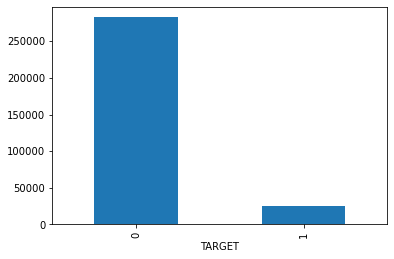

In [6]:
%matplotlib inline
TARGET_GD=hcd.groupby('TARGET').size()
TARGET_GD.plot(kind='bar')

In [7]:
#ind_vars=hcd.iloc[0:,0:25]
#dep_var=hcd.iloc[0:,-1:]
# X=ind_vars
# Y=dep_var
# print(X.shape)
# print(Y.shape)

In [34]:
hcd.describe(include='all')

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,...,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,ORGANIZATION_TYPE,TARGET
count,307507,307507,307507,307507,307507.000000,3.075070e+05,3.075070e+05,307507.000000,3.075070e+05,307507,...,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507.000000,307507,307507.00000
unique,2,2,2,2,NaN,NaN,NaN,NaN,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58,NaN
top,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,NaN,Unaccompanied,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business Entity Type 3,NaN
freq,278232,202448,202922,213308,NaN,NaN,NaN,NaN,NaN,249815,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67992,NaN
mean,NaN,NaN,NaN,NaN,0.417047,1.687977e+05,5.990286e+05,27108.580714,5.383178e+05,NaN,...,0.020062,-16037.027271,63815.929208,-4986.131376,-2994.201670,2.152657,2.052461,2.031518,NaN,0.08073
std,NaN,NaN,NaN,NaN,0.722119,2.371246e+05,4.024926e+05,14493.522125,3.692898e+05,NaN,...,0.011445,4363.982424,141276.472519,3522.883030,1509.454566,0.910677,0.509034,0.502737,NaN,0.27242
min,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,NaN,...,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,1.000000,1.000000,1.000000,NaN,0.00000
25%,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,NaN,...,0.010006,-19682.000000,-2760.000000,-7479.500000,-4299.000000,2.000000,2.000000,2.000000,NaN,0.00000
50%,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,NaN,...,0.018850,-15750.000000,-1213.000000,-4504.000000,-3254.000000,2.000000,2.000000,2.000000,NaN,0.00000
75%,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,NaN,...,0.028663,-12413.000000,-289.000000,-2010.000000,-1720.000000,3.000000,2.000000,2.000000,NaN,0.00000


In [9]:
#a=hcd.nunique()
#b=hcd.isnull().sum()

## Classifying the columns

**CATEGORICAL** : NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, ORGANIZATION_TYPE, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY<br><br>
**CONTINUOUS** : CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, OWN_CAR_AGE, CNT_FAM_MEMBERS

# Visualizing the CONTINUOUS columns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4444968E0>,
      dtype=object)

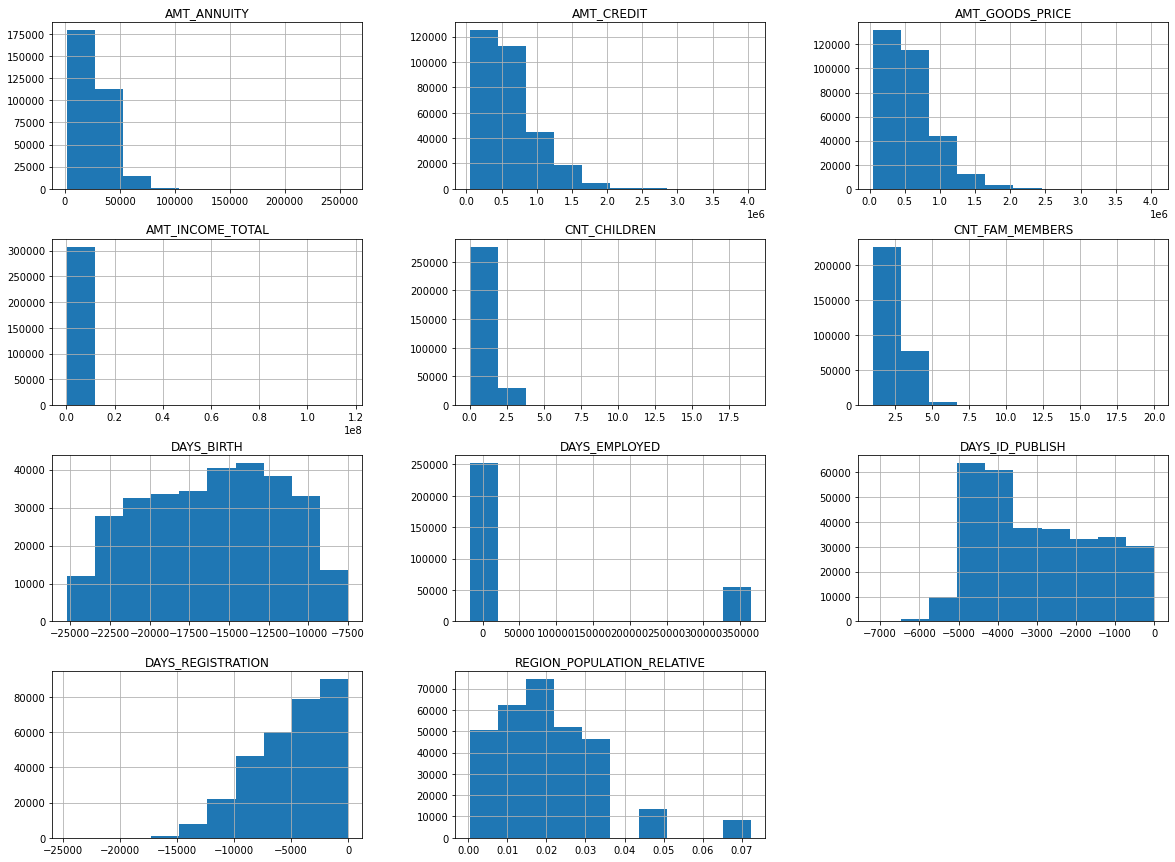

In [10]:
con_cols=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']
hcd.hist(con_cols,figsize=(20,15))

**Function to plot distribution of columns & their relationship with target variable**

In [ ]:
def distrel(data,target,colslist):
    """This columnOps.py module contains distrel function to plot column/variable distributions and also their relationship 
    strengths with the target variable. It takes your dataset, the exact target variable name (string), the list of columns on 
    which plotting is to be done. distrel() function returns a distribution plot and a relationship strength plot side-by-side."""
    
    %matplotlib inline
    import pandas as pd
    if data[target].nunique()==2: #CATEGORICAL ****TARGET
        print(target,'is CATEGORICAL. Boxplots and GroupedBarCharts needed')
        
        if type(colslist[0])==str | colslist[0].nunique()<=5: #CATEGORICAL colslist
            for each_cat_col in colslist:
                data.groupby(each_cat_col).size().plot(kind='bar') #1. Plot bar distribution
                
                CrossTabResult=pd.crosstab(index=data[each_cat_col], columns=data[target]) #2. Plot GBC
                CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i])
        else: #CONTINUOUS colslist
            for each_con_col in colslist:
                data.hist(each_con_col) #1. Plot histo distribution
                
                data.boxplot(column=each_con_col, by=target, figsize=(5,5), vert=True, ax=PlotCanvas[i]) #2. Plot Boxplot
    
    else: #CONTINUOUS ****TARGET
        print(target,'is CONTINUOUS. Scatterplots and Boxplots needed')
        
        if type(colslist[0])==str | colslist[0].nunique()<=5: #CATEGORICAL colslist
            for each_cat_col in colslist:
                data.groupby(each_cat_col).size().plot(kind='bar') #1. Plot bar distribution
                
                data.boxplot(column=each_con_col, by=target, figsize=(5,5), vert=True, ax=PlotCanvas[i]) #2. Plot Boxplot
                
        else: #CONTINUOUS colslist
            for each_con_col in colslist:
                data.hist(each_con_col) #1. Plot histo distribution
                
                data.plot.scatter(x=each_con_col, y=target, figsize=(10,5)) #2. Plot Scatterplot

In [11]:
import columnOps 
columnOps.colops(hcd)

,Unique_Count,Null_Count,%age_of_Data,Operation
NAME_CONTRACT_TYPE,2,0,0.000000,Impute
CODE_GENDER,3,0,0.000000,Impute
FLAG_OWN_CAR,2,0,0.000000,Impute
FLAG_OWN_REALTY,2,0,0.000000,Impute
CNT_CHILDREN,15,0,0.000000,Impute
AMT_INCOME_TOTAL,2548,0,0.000000,Impute
AMT_CREDIT,5603,0,0.000000,Impute
AMT_ANNUITY,13672,12,0.003902,Impute
AMT_GOODS_PRICE,1002,278,0.090403,Impute
NAME_TYPE_SUITE,7,1292,0.420148,Impute


In [12]:
Drop_List=['OWN_CAR_AGE','OCCUPATION_TYPE']
hcd=hcd.drop(Drop_List, axis=1)

In [13]:
impute_con_cols=['AMT_ANNUITY','AMT_GOODS_PRICE','CNT_FAM_MEMBERS']
impute_cat_cols=['NAME_TYPE_SUITE']

In [14]:
columnOps.impute(hcd,impute_con_cols,impute_cat_cols)

In [15]:
columnOps.colops(hcd)

,Unique_Count,Null_Count,%age_of_Data,Operation
NAME_CONTRACT_TYPE,2,0,0.0,Impute
CODE_GENDER,3,0,0.0,Impute
FLAG_OWN_CAR,2,0,0.0,Impute
FLAG_OWN_REALTY,2,0,0.0,Impute
CNT_CHILDREN,15,0,0.0,Impute
AMT_INCOME_TOTAL,2548,0,0.0,Impute
AMT_CREDIT,5603,0,0.0,Impute
AMT_ANNUITY,13672,0,0.0,Impute
AMT_GOODS_PRICE,1002,0,0.0,Impute
NAME_TYPE_SUITE,7,0,0.0,Impute


In [16]:
hcd['CODE_GENDER']=='XNA'
hcd.drop(hcd[hcd['CODE_GENDER']=='XNA'].index, inplace = True)

# Outlier Treatment

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4641FA0D0>,
      dtype=object)

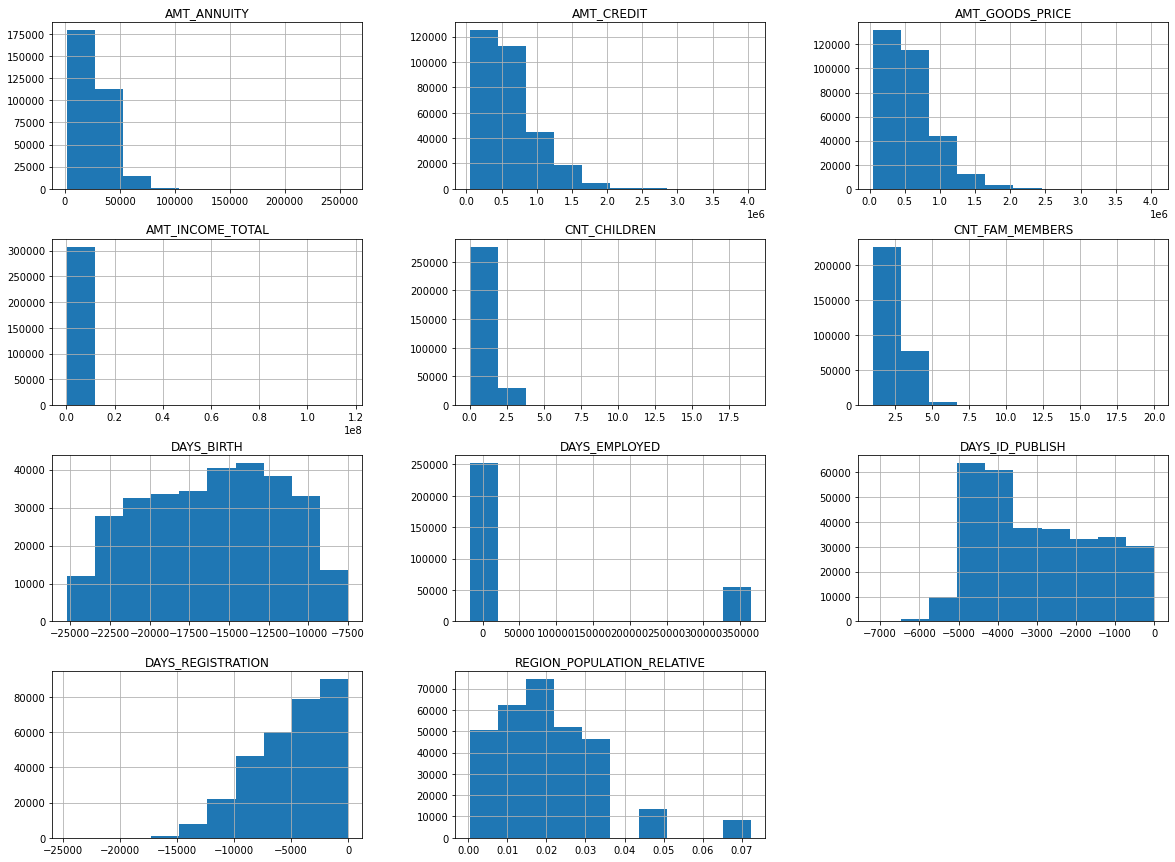

In [17]:
con_cols=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']
hcd.hist(con_cols,figsize=(20,15))

In [18]:
hcd['REGION_POPULATION_RELATIVE'][hcd['REGION_POPULATION_RELATIVE']>0.039]=0.045

In [19]:
columnOps.colops(hcd)

,Unique_Count,Null_Count,%age_of_Data,Operation
NAME_CONTRACT_TYPE,2,0,0.0,Impute
CODE_GENDER,2,0,0.0,Impute
FLAG_OWN_CAR,2,0,0.0,Impute
FLAG_OWN_REALTY,2,0,0.0,Impute
CNT_CHILDREN,15,0,0.0,Impute
AMT_INCOME_TOTAL,2548,0,0.0,Impute
AMT_CREDIT,5603,0,0.0,Impute
AMT_ANNUITY,13672,0,0.0,Impute
AMT_GOODS_PRICE,1002,0,0.0,Impute
NAME_TYPE_SUITE,7,0,0.0,Impute


In [20]:
cat_cols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

def plotBars(inp,cols):    
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    fig, subplot=plt.subplots(nrows=1, ncols=len(cat_cols),figsize=(25,10))
    for each_cat_col,plotnum in zip(cat_cols,range(len(cat_cols))):
        inp.groupby(each_cat_col).size().plot(kind='bar',ax=subplot[plotnum])
        

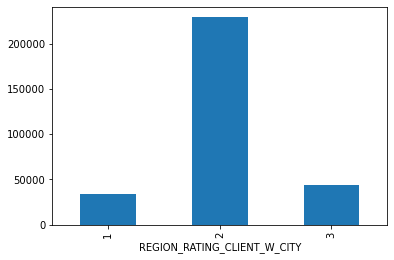

In [21]:
hcd.groupby('REGION_RATING_CLIENT_W_CITY').size().plot(kind='bar')

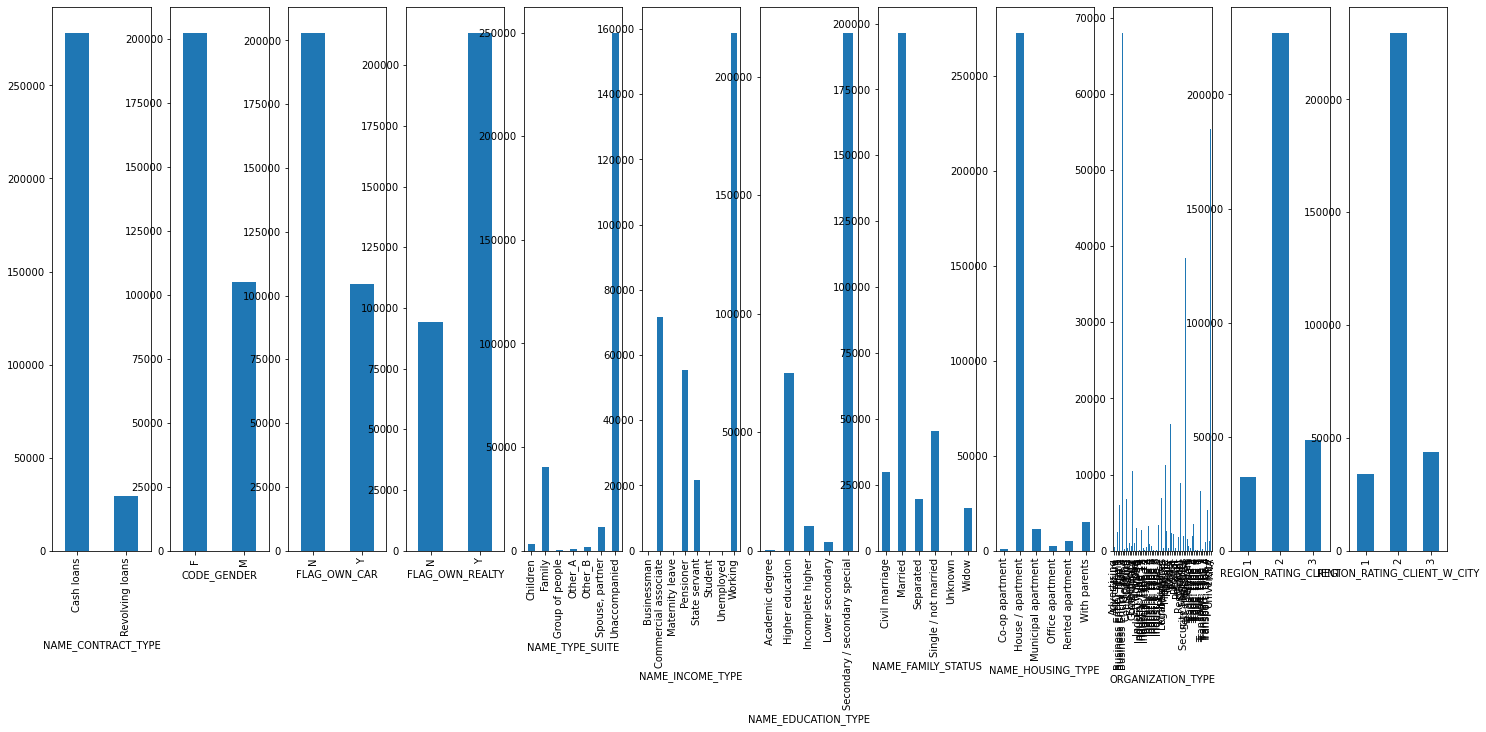

In [22]:
plotBars(hcd,cat_cols)

# Visual relationship exploration - CONTINUOUS vs CATEGORICAL

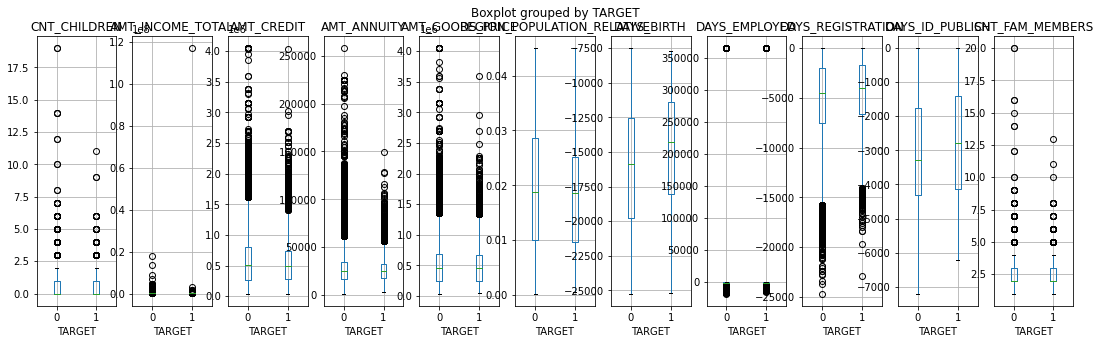

In [23]:
ContinuousColsList=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=1, ncols=len(ContinuousColsList), figsize=(18,5))
for PredictorCol , i in zip(ContinuousColsList, range(len(ContinuousColsList))):
    hcd.boxplot(column=PredictorCol, by='TARGET', figsize=(5,5), vert=True, ax=PlotCanvas[i])

# Statistical relationship exploration - CONTINUOUS vs CATEGORICAL

In [24]:
def FunctionAnova(inp, TargetVariable, ContinuousPredictorList):
    from scipy.stats import f_oneway
    SelectedPredictors_con=[]
    
    print('ANOVA Results\n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inp.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors_con.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    
    return(SelectedPredictors_con)

In [25]:
ContinuousVariables=['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE','DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']
FunctionAnova(inp=hcd, TargetVariable='TARGET', ContinuousPredictorList=ContinuousVariables)

ANOVA Results

CNT_CHILDREN is correlated with TARGET | P-Value: 1.90138028450078e-26
AMT_INCOME_TOTAL is correlated with TARGET | P-Value: 0.02725011559539886
AMT_CREDIT is correlated with TARGET | P-Value: 1.1283345778658891e-63
AMT_ANNUITY is correlated with TARGET | P-Value: 1.181182345206325e-12
AMT_GOODS_PRICE is correlated with TARGET | P-Value: 4.3066709585164264e-107
REGION_POPULATION_RELATIVE is correlated with TARGET | P-Value: 7.575584063503047e-82
DAYS_BIRTH is correlated with TARGET | P-Value: 0.0
DAYS_EMPLOYED is correlated with TARGET | P-Value: 3.548822689388271e-137
DAYS_REGISTRATION is correlated with TARGET | P-Value: 5.959413197880351e-120
DAYS_ID_PUBLISH is correlated with TARGET | P-Value: 2.537564154148633e-179
CNT_FAM_MEMBERS is correlated with TARGET | P-Value: 2.427760353082645e-07


['CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS']

**Selected CONTINUOUS Columns (11):** 'CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',<br>'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS'

# Visual relationship exploration - CATEGORICAL vs CATEGORICAL

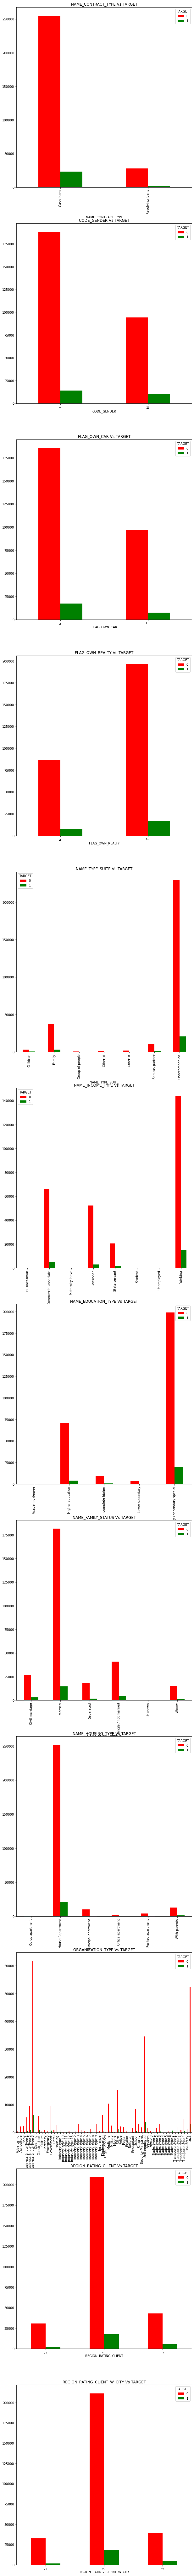

In [26]:
CategoricalColsList=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

import matplotlib.pyplot as plt
fig, PlotCanvas=plt.subplots(nrows=len(CategoricalColsList), ncols=1, figsize=(10,150))

for CategoricalCol , i in zip(CategoricalColsList, range(len(CategoricalColsList))):
    CrossTabResult=pd.crosstab(index=hcd[CategoricalCol], columns=hcd['TARGET'])
    CrossTabResult.plot.bar(color=['red','green'], ax=PlotCanvas[i], title=CategoricalCol+' Vs '+'TARGET')

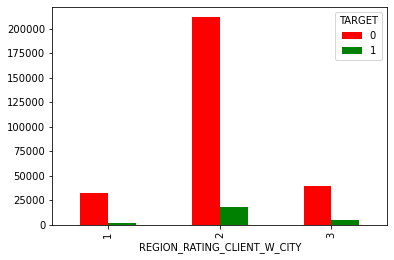

In [27]:
CrossTabResult=pd.crosstab(index=hcd['REGION_RATING_CLIENT_W_CITY'], columns=hcd['TARGET']) 
CrossTabResult.plot.bar(color=['red','green'])

# Statistical relationship exploration - CATEGORICAL vs CATEGORICAL

In [28]:
def FunctionChisq(inp, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    SelectedPredictors_cat=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inp[TargetVariable], columns=inp[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors_cat.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors_cat)

In [29]:
CategoricalColsList=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']

FunctionChisq(inp=hcd, 
              TargetVariable='TARGET',
              CategoricalVariablesList= CategoricalColsList)

NAME_CONTRACT_TYPE is correlated with TARGET | P-Value: 1.1274999190439246e-65
CODE_GENDER is correlated with TARGET | P-Value: 4.394091339983112e-202
FLAG_OWN_CAR is correlated with TARGET | P-Value: 9.410574445435375e-34
FLAG_OWN_REALTY is correlated with TARGET | P-Value: 0.0006716541669272181
NAME_TYPE_SUITE is correlated with TARGET | P-Value: 1.6742661127603496e-05
NAME_INCOME_TYPE is correlated with TARGET | P-Value: 1.851917468924633e-266
NAME_EDUCATION_TYPE is correlated with TARGET | P-Value: 2.462768187281203e-219
NAME_FAMILY_STATUS is correlated with TARGET | P-Value: 7.717800159426755e-107
NAME_HOUSING_TYPE is correlated with TARGET | P-Value: 1.1058276330411493e-88
ORGANIZATION_TYPE is correlated with TARGET | P-Value: 5.234820758918067e-299
REGION_RATING_CLIENT is correlated with TARGET | P-Value: 1.779815480242521e-232
REGION_RATING_CLIENT_W_CITY is correlated with TARGET | P-Value: 4.897039774068604e-249


['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'ORGANIZATION_TYPE',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY']

**Selected CATEGORICAL Columns (12):** 'NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',<br>'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY'

# Selecting final predictors for Machine Learning

In [30]:
SelectedCols=['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','ORGANIZATION_TYPE','REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY']+['CNT_CHILDREN','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','REGION_POPULATION_RELATIVE',
'DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH','CNT_FAM_MEMBERS']

DataForML=hcd[SelectedCols]
DataForML.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,ORGANIZATION_TYPE,...,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,CNT_FAM_MEMBERS
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Business Entity Type 3,...,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,1.0
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,School,...,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,2.0
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Government,...,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,1.0
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Business Entity Type 3,...,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,2.0
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Religion,...,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,1.0


In [31]:
DataForML.to_pickle('HCD.pkl')

# Data Pre-Processing

In [162]:
# DataForML['CODE_GENDER'].replace({'F':0, 'M':1}, inplace=True)
# DataForML['FLAG_OWN_CAR'].replace({'N':0, 'Y':1}, inplace=True)
# DataForML['FLAG_OWN_REALTY'].replace({'N':0, 'Y':1}, inplace=True)
# contract_map={'Cash loans':0,'Revolving loans':1}
# DataForML['CONTRACT_TYPE']=DataForML['NAME_CONTRACT_TYPE'].map(contract_map)
# ed_map={
#     'Lower secondary':0,
#     'Secondary / secondary special':1,
#     'Incomplete higher':2,
#     'Higher education':3,
#     'Academic degree':4
# }
# DataForML['EDUCATON_TYPE']=DataForML['NAME_EDUCATION_TYPE'].map(ed_map)

In [166]:
DataForML_Numeric=pd.get_dummies(DataForML)
DataForML_Numeric['TARGET']=hcd['TARGET']

DataForML_Numeric.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,TARGET
0,1,0,1,2,2,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,1,1,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,2,2,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,2,2,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,2,2,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


# Train-Test Split for Machine Learning

In [167]:
DataForML_Numeric.columns.tolist()

['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EDUCATON_TYPE',
 'CONTRACT_TYPE',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_

In [168]:
TargetVariable='TARGET'
Predictors=['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'CNT_CHILDREN',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'CNT_FAM_MEMBERS',
 'EDUCATON_TYPE',
 'CONTRACT_TYPE',
 'NAME_TYPE_SUITE_Children',
 'NAME_TYPE_SUITE_Family',
 'NAME_TYPE_SUITE_Group of people',
 'NAME_TYPE_SUITE_Other_A',
 'NAME_TYPE_SUITE_Other_B',
 'NAME_TYPE_SUITE_Spouse, partner',
 'NAME_TYPE_SUITE_Unaccompanied',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_FAMILY_STATUS_Civil marriage',
 'NAME_FAMILY_STATUS_Married',
 'NAME_FAMILY_STATUS_Separated',
 'NAME_FAMILY_STATUS_Single / not married',
 'NAME_FAMILY_STATUS_Unknown',
 'NAME_FAMILY_STATUS_Widow',
 'NAME_HOUSING_TYPE_Co-op apartment',
 'NAME_HOUSING_TYPE_House / apartment',
 'NAME_HOUSING_TYPE_Municipal apartment',
 'NAME_HOUSING_TYPE_Office apartment',
 'NAME_HOUSING_TYPE_Rented apartment',
 'NAME_HOUSING_TYPE_With parents',
 'ORGANIZATION_TYPE_Advertising',
 'ORGANIZATION_TYPE_Agriculture',
 'ORGANIZATION_TYPE_Bank',
 'ORGANIZATION_TYPE_Business Entity Type 1',
 'ORGANIZATION_TYPE_Business Entity Type 2',
 'ORGANIZATION_TYPE_Business Entity Type 3',
 'ORGANIZATION_TYPE_Cleaning',
 'ORGANIZATION_TYPE_Construction',
 'ORGANIZATION_TYPE_Culture',
 'ORGANIZATION_TYPE_Electricity',
 'ORGANIZATION_TYPE_Emergency',
 'ORGANIZATION_TYPE_Government',
 'ORGANIZATION_TYPE_Hotel',
 'ORGANIZATION_TYPE_Housing',
 'ORGANIZATION_TYPE_Industry: type 1',
 'ORGANIZATION_TYPE_Industry: type 10',
 'ORGANIZATION_TYPE_Industry: type 11',
 'ORGANIZATION_TYPE_Industry: type 12',
 'ORGANIZATION_TYPE_Industry: type 13',
 'ORGANIZATION_TYPE_Industry: type 2',
 'ORGANIZATION_TYPE_Industry: type 3',
 'ORGANIZATION_TYPE_Industry: type 4',
 'ORGANIZATION_TYPE_Industry: type 5',
 'ORGANIZATION_TYPE_Industry: type 6',
 'ORGANIZATION_TYPE_Industry: type 7',
 'ORGANIZATION_TYPE_Industry: type 8',
 'ORGANIZATION_TYPE_Industry: type 9',
 'ORGANIZATION_TYPE_Insurance',
 'ORGANIZATION_TYPE_Kindergarten',
 'ORGANIZATION_TYPE_Legal Services',
 'ORGANIZATION_TYPE_Medicine',
 'ORGANIZATION_TYPE_Military',
 'ORGANIZATION_TYPE_Mobile',
 'ORGANIZATION_TYPE_Other',
 'ORGANIZATION_TYPE_Police',
 'ORGANIZATION_TYPE_Postal',
 'ORGANIZATION_TYPE_Realtor',
 'ORGANIZATION_TYPE_Religion',
 'ORGANIZATION_TYPE_Restaurant',
 'ORGANIZATION_TYPE_School',
 'ORGANIZATION_TYPE_Security',
 'ORGANIZATION_TYPE_Security Ministries',
 'ORGANIZATION_TYPE_Self-employed',
 'ORGANIZATION_TYPE_Services',
 'ORGANIZATION_TYPE_Telecom',
 'ORGANIZATION_TYPE_Trade: type 1',
 'ORGANIZATION_TYPE_Trade: type 2',
 'ORGANIZATION_TYPE_Trade: type 3',
 'ORGANIZATION_TYPE_Trade: type 4',
 'ORGANIZATION_TYPE_Trade: type 5',
 'ORGANIZATION_TYPE_Trade: type 6',
 'ORGANIZATION_TYPE_Trade: type 7',
 'ORGANIZATION_TYPE_Transport: type 1',
 'ORGANIZATION_TYPE_Transport: type 2',
 'ORGANIZATION_TYPE_Transport: type 3',
 'ORGANIZATION_TYPE_Transport: type 4',
 'ORGANIZATION_TYPE_University',
 'ORGANIZATION_TYPE_XNA']

X=DataForML_Numeric[Predictors].values
y=DataForML_Numeric[TargetVariable].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=428)

# Running Logistic Regression Model

In [224]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C=5,penalty='l2', solver='newton-cg')
print(clf)
LOG=clf.fit(X_train,y_train)
prediction=LOG.predict(X_test)

prediction=LOG.predict(X_test)

TestingData=pd.DataFrame(data=X_test, columns=Predictors)
TestingData['TARGET']=y_test
TestingData['Predicted_TARGET']=prediction
print(TestingData.head())


from sklearn import metrics
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(prediction, y_test))

F1_Score=metrics.f1_score(y_test, prediction, average='weighted')
print('Accuracy of the model on Testing Sample Data:', round(F1_Score,2))

from sklearn.model_selection import cross_val_score

Accuracy_Values=cross_val_score(LOG, X , y, cv=10, scoring='f1_weighted')
print('\nAccuracy values for 10-fold Cross Validation:\n',Accuracy_Values)
print('\nFinal Average Accuracy of the model:', round(Accuracy_Values.mean(),2))

LogisticRegression(C=5, solver='newton-cg')
   CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  REGION_RATING_CLIENT  \
0          1.0           0.0              0.0                   2.0   
1          0.0           1.0              1.0                   2.0   
2          0.0           1.0              0.0                   2.0   
3          0.0           0.0              1.0                   2.0   
4          1.0           0.0              1.0                   2.0   

   REGION_RATING_CLIENT_W_CITY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                          2.0           0.0          157500.0    135000.0   
1                          2.0           1.0          112500.0    675000.0   
2                          2.0           2.0          180000.0    375367.5   
3                          2.0           0.0           90000.0    545040.0   
4                          2.0           0.0           67500.0    112500.0   

   AMT_ANNUITY  AMT_GOODS_PRICE  ...  ORGANIZATION_TYPE_Trad